# Pandas

In [ ]:
! pip3 install pandas

In [14]:
import pandas as pd

In [15]:
# Series object - jednorozmerny
s = pd.Series(range(1,6), index=['a', 'b', 'c', 'd', 'e'])

print(s)
print(s['b'])
print(s.iloc[3]) # pro index

print(s['b':'e'])
print(s.iloc[1:5:2])

a    1
b    2
c    3
d    4
e    5
dtype: int64
2
4
b    2
c    3
d    4
e    5
dtype: int64
b    2
d    4
dtype: int64


In [16]:
# Data frame object - dvojrozmerny
# Je to vlastne slovnik series objektu (sloupcu)

In [21]:
df = pd.read_csv("nakazeni-vyleceni-umrti-testy.csv")

In [22]:
df.set_index(['datum'], drop = True, inplace = True)
df.index = pd.to_datetime(df.index)
new_names = ["inf", "cur", "dead", "tests", "ag", "d_inf", "d_cur", "d_dead", "d_tests", "d_ag"]
df.columns = new_names

In [24]:
df

,inf,cur,dead,tests,ag,d_inf,d_cur,d_dead,d_tests,d_ag
datum,,,,,,,,,,
2020-01-27,0,0,0,20,0,0,0,0,20,0
2020-01-28,0,0,0,28,0,0,0,0,8,0
2020-01-29,0,0,0,33,0,0,0,0,5,0
2020-01-30,0,0,0,34,0,0,0,0,1,0
2020-01-31,0,0,0,37,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-18,4167825,4123091,41762,21976205,34117791,438,670,6,1886,3123
2022-11-19,4167944,4123703,41766,21976879,34118292,119,612,4,674,501
2022-11-20,4168023,4124169,41769,21977160,34118836,79,466,3,281,544


# Plotly

In [ ]:
! pip3 install plotly

### Plotly express

In [11]:
import plotly.express as px
import numpy as np

In [12]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

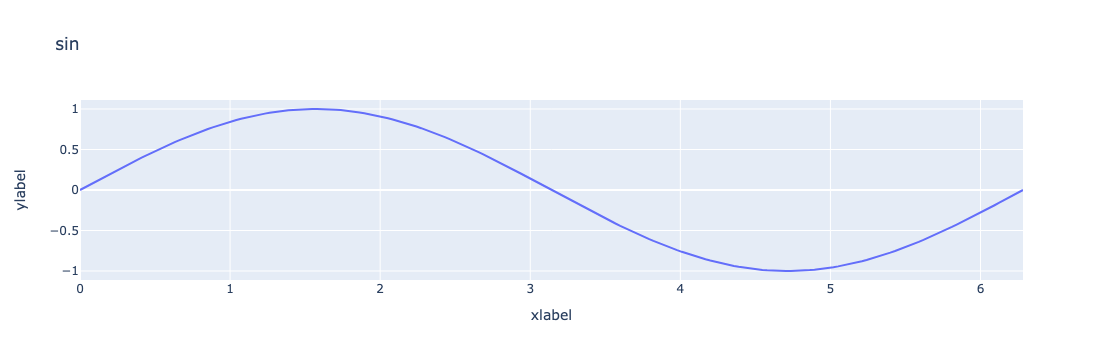

In [19]:
fig = px.line(x=x, y=y, labels={'x': 'xlabel', 'y': 'ylabel'}, title='sin')
fig.show()

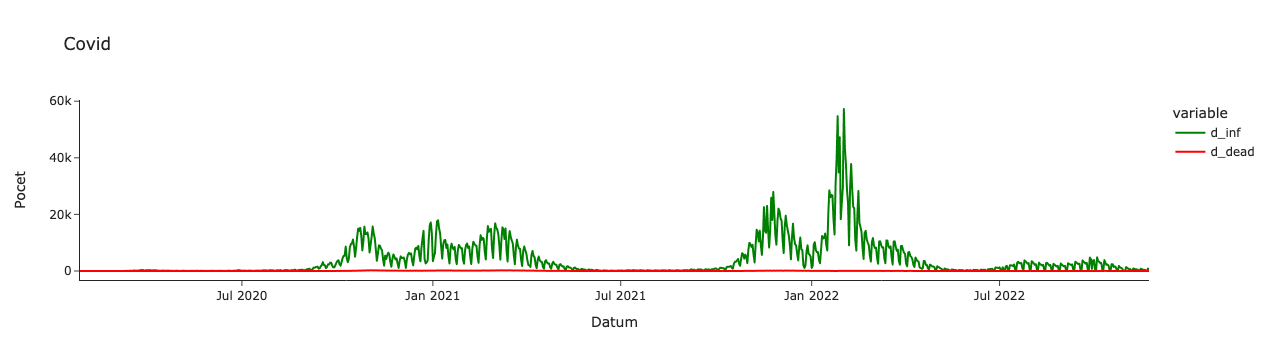

In [30]:
fig = px.line(df, 
              y=['d_inf', 'd_dead'],
              title='Covid',
              labels={'datum': 'Datum', 'value': 'Pocet'},
             color_discrete_map= {'d_inf': 'green', 'd_dead': 'red'},
              template='simple_white'
             )
fig.show()

### Plotly Graph Objects

In [31]:
import plotly.graph_objects as go

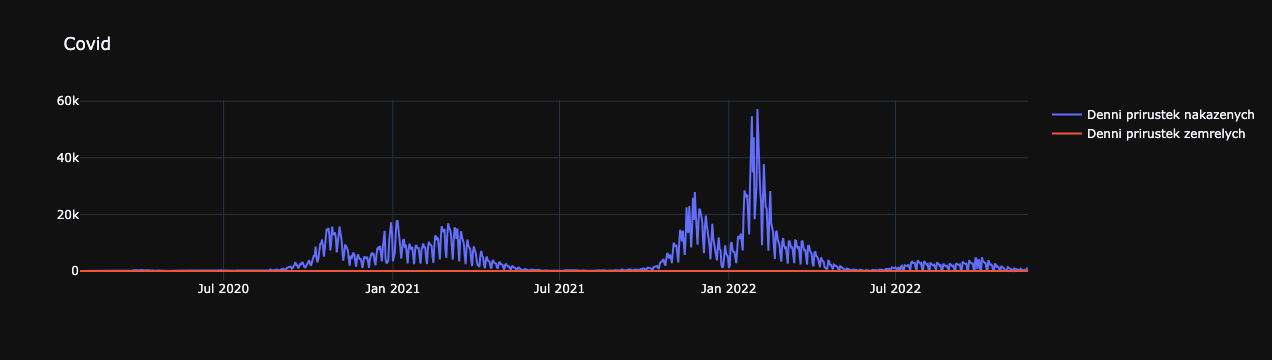

In [35]:
fig = go.Figure()

dinf_trace = go.Scatter(x=df.index, y=df['d_inf'], name='Denni prirustek nakazenych')
ddead_trace = go.Scatter(x=df.index, y=df['d_dead'], name='Denni prirustek zemrelych')
fig.add_trace(dinf_trace)
fig.add_trace(ddead_trace)

fig.update_layout(template='plotly_dark',
                 title='Covid')

fig.show()

In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

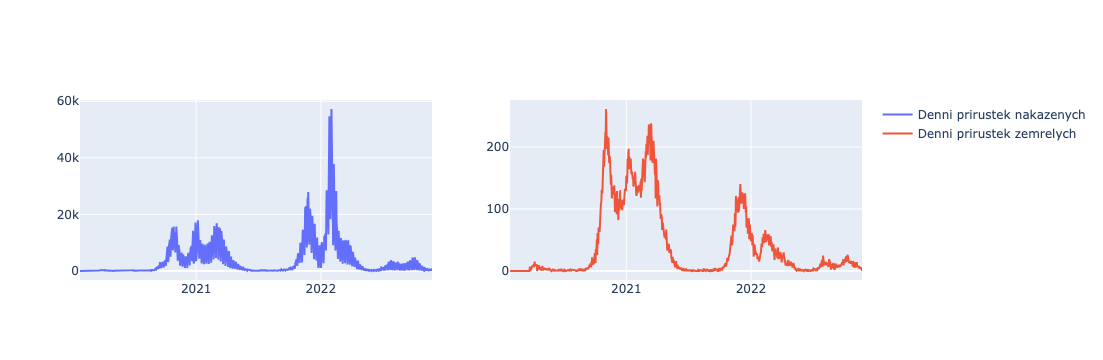

In [40]:
fig = make_subplots(rows=1, cols=2)

dinf_trace = go.Scatter(x=df.index, y=df['d_inf'], name='Denni prirustek nakazenych')
ddead_trace = go.Scatter(x=df.index, y=df['d_dead'], name='Denni prirustek zemrelych')
fig.add_trace(dinf_trace, row=1, col=1)
fig.add_trace(ddead_trace, row=1, col=2)

fig.show()

In [41]:
df_pie = pd.DataFrame(df[['cur', 'dead']].iloc[-1])
df_pie.columns = ['CuredVsDead']
df_pie

,CuredVsDead
cur,4124907
dead,41774


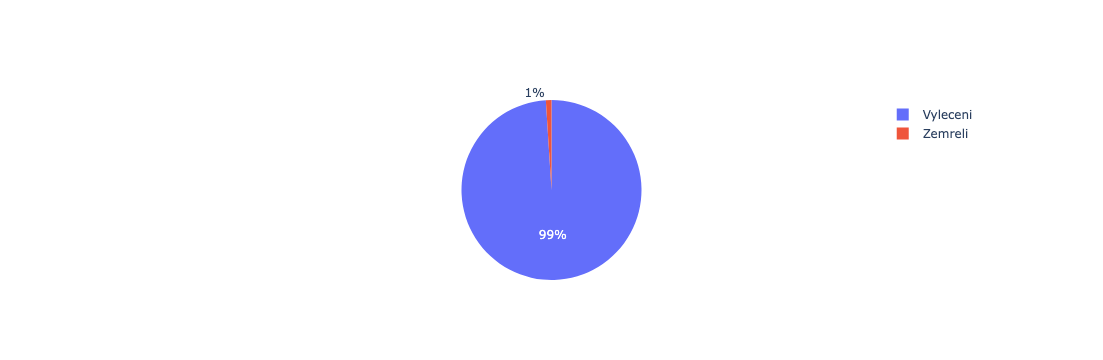

In [43]:
fig = go.Figure()

pie_trace = go.Pie(values=df_pie['CuredVsDead'], labels=['Vyleceni', 'Zemreli'])
fig.add_trace(pie_trace)

fig.show()

In [44]:
df_bar = df.resample('2M').agg({'d_inf': 'sum', 'd_cur': 'sum'})
df_bar

,d_inf,d_cur
datum,,
2020-01-31,0,0
2020-03-31,3316,130
2020-05-31,6007,7702
2020-07-31,7301,5390
2020-09-30,54202,33522
2020-11-30,452640,430348
2021-01-31,467148,430744
2021-03-31,554653,507688
2021-05-31,122925,208896


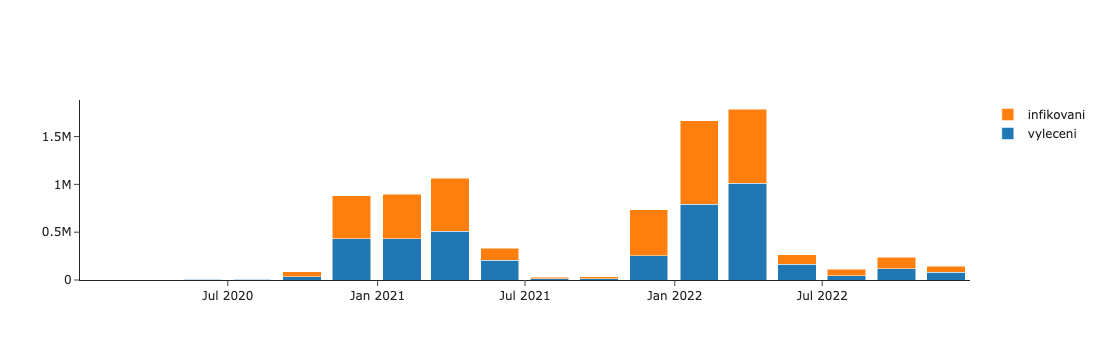

In [47]:
fig = go.Figure()

dcur_trace = go.Bar(name='vyleceni', x=df_bar.index, y=df_bar['d_cur'])
dinf_trace = go.Bar(name='infikovani', x=df_bar.index, y=df_bar['d_inf'])
fig.add_traces([dcur_trace, dinf_trace])

fig.update_layout(template='simple_white',
                 barmode='stack')

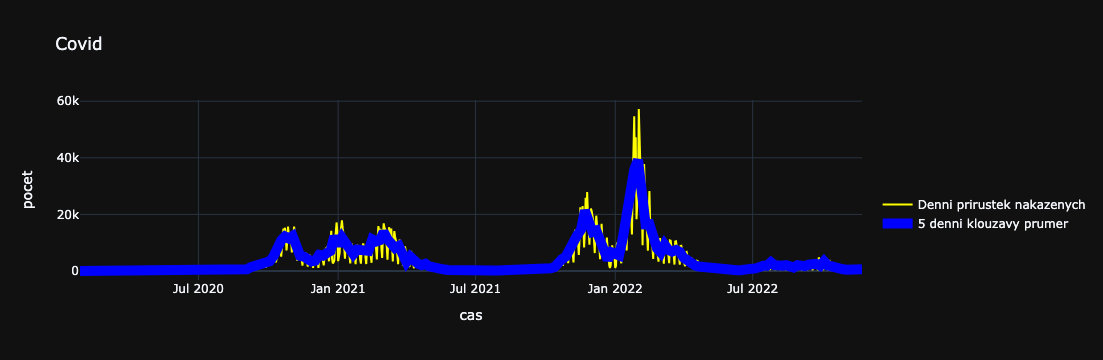

In [53]:
fig = go.Figure()

df_avg = df.resample('5D').agg({'d_inf': 'mean'})

dinf_trace = go.Scatter(x=df.index, y=df['d_inf'], name='Denni prirustek nakazenych')
dinfavg_trace = go.Scatter(x=df_avg.index, y=df_avg['d_inf'], name='5 denni klouzavy prumer')
fig.add_trace(dinf_trace)
fig.add_trace(dinfavg_trace)

fig.update_layout(template='plotly_dark',
                 title='Covid',
                 xaxis_title='cas',
                 yaxis_title='pocet',
                 legend={
                     'yanchor': 'top',
                     'y': 0.5
                 })

fig.update_traces(selector={'name': 'Denni prirustek nakazenych'}, line={'color': 'yellow'})

fig.data[1].line = {'color': 'blue'}

fig.data[1].line.width = 10

fig.show()

In [65]:
df = pd.read_csv("titanic.csv")
mask = df['Survived'] == 1
df_filtered = df[mask][['Sex', 'Survived']]
df_filtered = df_filtered.groupby('Sex').agg({'Survived': 'sum'})

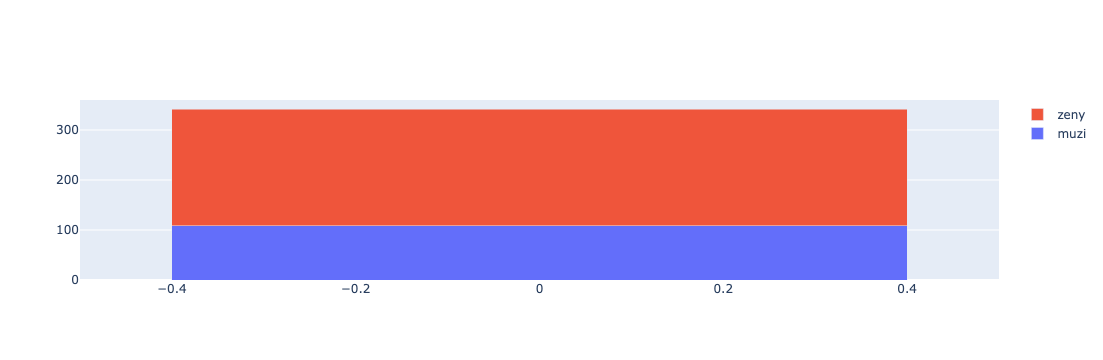

In [71]:
fig = go.Figure()

male_bar_trace = go.Bar(name='muzi', y=df_filtered.loc['male'])
female_bar_trace = go.Bar(name='zeny', y=df_filtered.loc['female'])
fig.add_traces([male_bar_trace, female_bar_trace])

fig.update_layout(
                 barmode='stack')

fig.show()

# Dash

In [ ]:
! pip3 install dash

In [78]:
from dash import Dash, html

In [79]:
app = Dash()

app.layout = html.Div(
    [html.H1("Hello world")]
)

app.run_server(mode='inline')